In [69]:
### Load PPS model
%run ./PPS_model.ipynb

In [142]:
### Audio-tactile experiment simulation setup 

## Calculate distance in cms. Speaker is positioned at 100cm from the hand. 
times = np.asarray([300,800,1500,2200,2700])
timesweep = np.arange(300,2800,100)
ts = timesweep/1000
v = 30 #cm/s 
a_distances = (120 - ts*v) # distance points in cm (network coordinates)

## Simulation setup
simtime = 200 #ms 

## Synapses setup
Lt,La = Lw(0.15,2.95,1,4,0.15,2.95,20,80)
Wt,Wa,Bt,Ba = Fw(6.5,6.5,2.5,2.5) 
bi = 0
pr = 0

In [134]:
idx = [0,5,12,19,24]
distances = np.take(a_distances,idx)
hcRTs,ZMs,ZTs,ZAs = experimentrun(distances,simtime,0,0)

0.37292460309307457


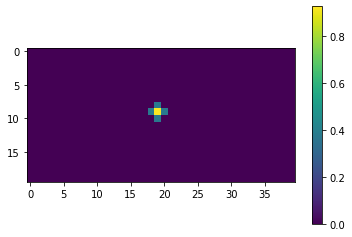

In [135]:
dt = 0.4
evdis = 2
timesteps = int(simtime/dt)

#plt.figure(2)
plt.imshow(ZTs[:,:,evdis].transpose());
plt.colorbar()
print(ZTs[20,9,evdis])

In [138]:
## Experiment function
def myexperimentrun(a_distances,time,b,pr):
    dt = 0.4
    timesteps = int(time/dt)
    ndist = len(a_distances)
    
    RTs = np.zeros(ndist)
    ZTs = np.zeros((Mt,Nt,ndist))
    ZAs = np.zeros((Ma,Na,ndist))
    
    ti = PHIt(0) 
    PrBa = prun(Ba,pr)
    PrWa = prun(Wa,pr*2.6)
    dtau = dt/tau
    
    qt = np.zeros((Mt,Nt,timesteps+1,ndist))
    ut = np.zeros((Mt,Nt,timesteps+1,ndist))
    zt = np.zeros((Mt,Nt,timesteps+1,ndist))
    pt = np.zeros((Mt,Nt,timesteps+1,ndist))

    qa = np.zeros((Ma,Na,timesteps+1,ndist))
    ua = np.zeros((Ma,Na,timesteps+1,ndist))
    za = np.zeros((Ma,Na,timesteps+1,ndist))
    pa = np.zeros((Ma,Na,timesteps+1,ndist))

    qm = np.zeros((timesteps+1,ndist))
    um = np.zeros((timesteps+1,ndist))
    zm = np.zeros((timesteps+1,ndist))
    pm = np.zeros((timesteps+1,ndist))
    
    ZT = np.zeros((1,timesteps+1,ndist))
    
    for d in range(ndist):
        xa_0 = a_distances[d] # How far the sound is presented.     
        ai = PHIa(0,xa_0) # Generates an auditory input

        for i in range(timesteps):    
            # Tactile activity
            ut[:,:,i+1,d] = ti+LIt(zt[:,:,i,d])+bt(zm[i,d])
            qt[:,:,i+1,d] = qt[:,:,i,d] + dtau*(-qt[:,:,i,d]+ut[:,:,i,d])
            pt[:,:,i+1,d] = psit(qt[:,:,i,d],b)
            zt[:,:,i+1,d] = pt[:,:,i,d]*np.heaviside(pt[:,:,i,d],0)

            ZT[0,i+1,d] = np.sum(zt[:,:,i,d])

            # Auditory activity
            ua[:,:,i+1,d] = ai+LIa(za[:,:,i,d])+ba(zm[i,d],PrBa) 
            qa[:,:,i+1,d] = qa[:,:,i,d] + dtau*(-qa[:,:,i,d]+ua[:,:,i,d])
            pa[:,:,i+1,d] = psia(qa[:,:,i,d],b)
            za[:,:,i+1,d] = pa[:,:,i,d]*np.heaviside(pa[:,:,i,d],0)

            # Multisensory activity
            um[i+1,d] = np.sum(np.multiply(Wt,zt[:,:,i,d])) + np.sum(np.multiply(PrWa,za[:,:,i,d]))
            qm[i+1,d] = qm[i,d] + dtau*(-qm[i,d]+um[i,d])
            pm[i+1,d] = psim(qm[i,d])
            zm[i+1,d] = pm[i,d]*np.heaviside(pm[i,d],0)
            
        RT = np.argmax(zt[19,9,:,d]>0.9)*dt    
        RTs[d] = RT
        ZMs = zm        
        ZTs[:,:,d] = zt[:,:,timesteps,d]
        ZAs[:,:,d] = za[:,:,timesteps,d]   
    return RTs,ZMs,ZTs,ZAs


In [143]:
idx = [0,5,12,19,24]
distances = np.take(a_distances,idx)
hcRTs,ZMs,ZTs,ZAs = myexperimentrun(distances,simtime,0,0)

[92.8 91.6 90.8 90.4 90.4]


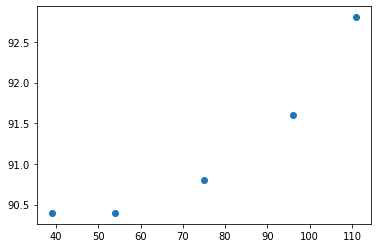

In [144]:
plt.figure(1)
plt.scatter(distances,hcRTs)
print(hcRTs)

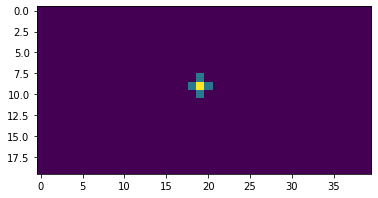

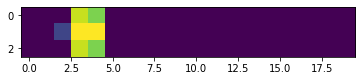

In [141]:
evdis = 4

plt.figure(2)
plt.imshow(ZTs[:,:,evdis].transpose());

plt.figure(3)
plt.imshow(ZAs[:,:,evdis].transpose());